In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [166]:
ava_data = pd.read_csv("../data/ava.csv")

In [167]:
ava_data["avg_score"] = ava_data["avg_score"].apply(lambda x: round((x // 0.2) * 0.2, 2))
ava_data.describe()

,index,img_id,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,avg_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,128085.370900,467623.470500,2.726000,5.767200,14.015200,35.038400,60.636700,47.694700,24.483300,11.859300,5.020300,2.947700,5.277480
std,73368.856099,297471.156373,6.011733,7.531818,13.128168,22.113426,22.722485,20.094046,15.889153,10.679977,5.938486,4.356428,0.732368
min,23.000000,66.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,64788.500000,196476.500000,0.000000,1.000000,5.000000,17.000000,45.000000,34.000000,12.000000,4.000000,1.000000,1.000000,4.800000
50%,127174.500000,461974.500000,1.000000,3.000000,10.000000,31.000000,59.000000,47.000000,22.000000,9.000000,3.000000,2.000000,5.200000
75%,192055.500000,741343.500000,3.000000,8.000000,19.000000,49.000000,74.000000,59.000000,34.000000,17.000000,7.000000,4.000000,5.800000
max,255530.000000,958275.000000,171.000000,82.000000,106.000000,161.000000,220.000000,188.000000,128.000000,108.000000,72.000000,83.000000,8.200000


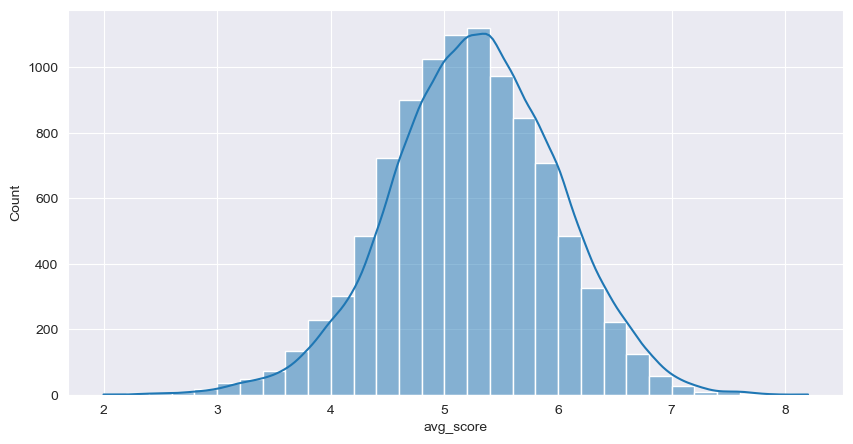

In [168]:
score_count = ava_data[["avg_score", "index"]].groupby("avg_score").count()
score_count.reset_index(inplace=True)

ax = sns.histplot(ava_data, x="avg_score", binwidth=0.2, kde=True)
ax.figure.set_size_inches(10, 5)

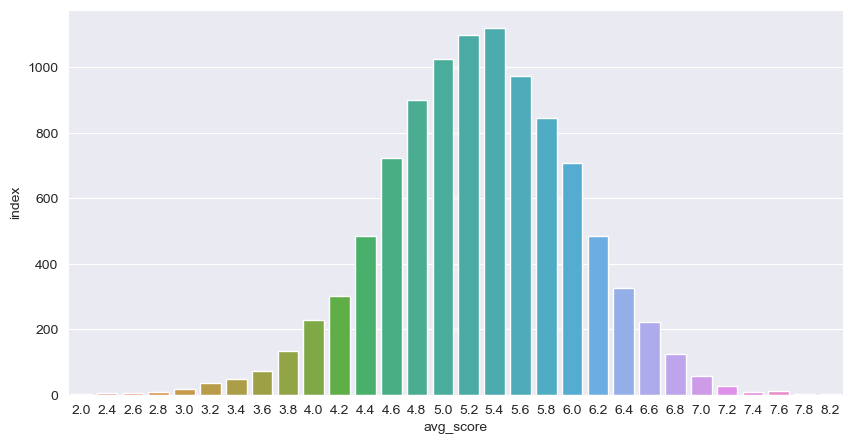

In [169]:
ax = sns.barplot(score_count, x="avg_score", y="index")
ax.figure.set_size_inches(10, 5)

In [170]:
from math import sqrt

ava_data["count"] = sum([ava_data[f"score_{i}"] for i in range(1, 11)])
ava_data["variance"] = sum([
    ((i - ava_data["avg_score"]) ** 2) *
    ava_data[f"score_{i}"]
    for i in range(1, 11)
]) / ava_data["count"]
ava_data["std"] = ava_data["variance"].apply(lambda x: sqrt(x))
ava_data.drop(["variance"], axis=1, inplace=True)
ava_data

,index,img_id,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,avg_score,count,std
0,23,954228,5,9,17,17,43,18,12,1,5,2,4.8,129,1.861399
1,30,953348,0,0,9,16,62,23,10,2,0,1,5.0,123,1.133381
2,60,953794,0,0,5,30,48,30,9,1,2,1,5.0,126,1.201850
3,97,954206,0,0,8,17,53,31,7,4,1,1,5.2,122,1.203410
4,105,954133,1,0,9,22,51,32,5,0,0,0,4.8,120,1.040833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,255474,56925,14,17,33,61,63,41,9,5,1,2,4.4,246,1.652001
9996,255514,56668,1,10,11,28,49,66,44,30,13,6,5.8,258,1.789201
9997,255526,56938,1,7,17,40,84,56,31,13,6,1,5.2,256,1.505770
9998,255528,56711,0,0,8,11,26,47,48,56,30,22,7.0,248,1.741338


In [171]:
ava_data["skew"] = sum([
    (((i - ava_data["avg_score"]) / ava_data["std"]) ** 3) * ava_data[f"score_{i}"]
    for i in range(1, 11)
]) / ava_data["count"]
ava_data

,index,img_id,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,avg_score,count,std,skew
0,23,954228,5,9,17,17,43,18,12,1,5,2,4.8,129,1.861399,0.317165
1,30,953348,0,0,9,16,62,23,10,2,0,1,5.0,123,1.133381,1.083350
2,60,953794,0,0,5,30,48,30,9,1,2,1,5.0,126,1.201850,1.426372
3,97,954206,0,0,8,17,53,31,7,4,1,1,5.2,122,1.203410,0.917060
4,105,954133,1,0,9,22,51,32,5,0,0,0,4.8,120,1.040833,-0.071540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,255474,56925,14,17,33,61,63,41,9,5,1,2,4.4,246,1.652001,0.127903
9996,255514,56668,1,10,11,28,49,66,44,30,13,6,5.8,258,1.789201,0.120011
9997,255526,56938,1,7,17,40,84,56,31,13,6,1,5.2,256,1.505770,0.435227
9998,255528,56711,0,0,8,11,26,47,48,56,30,22,7.0,248,1.741338,-0.132877


In [172]:
ava_data["kur"] = sum([
    (((i - ava_data["avg_score"]) / ava_data["std"]) ** 4) * ava_data[f"score_{i}"]
    for i in range(1, 11)
]) / ava_data["count"]
ava_data

,index,img_id,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,avg_score,count,std,skew,kur
0,23,954228,5,9,17,17,43,18,12,1,5,2,4.8,129,1.861399,0.317165,3.372472
1,30,953348,0,0,9,16,62,23,10,2,0,1,5.0,123,1.133381,1.083350,5.567617
2,60,953794,0,0,5,30,48,30,9,1,2,1,5.0,126,1.201850,1.426372,5.713440
3,97,954206,0,0,8,17,53,31,7,4,1,1,5.2,122,1.203410,0.917060,5.057851
4,105,954133,1,0,9,22,51,32,5,0,0,0,4.8,120,1.040833,-0.071540,3.518826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,255474,56925,14,17,33,61,63,41,9,5,1,2,4.4,246,1.652001,0.127903,3.550799
9996,255514,56668,1,10,11,28,49,66,44,30,13,6,5.8,258,1.789201,0.120011,2.885958
9997,255526,56938,1,7,17,40,84,56,31,13,6,1,5.2,256,1.505770,0.435227,3.385739
9998,255528,56711,0,0,8,11,26,47,48,56,30,22,7.0,248,1.741338,-0.132877,2.508488


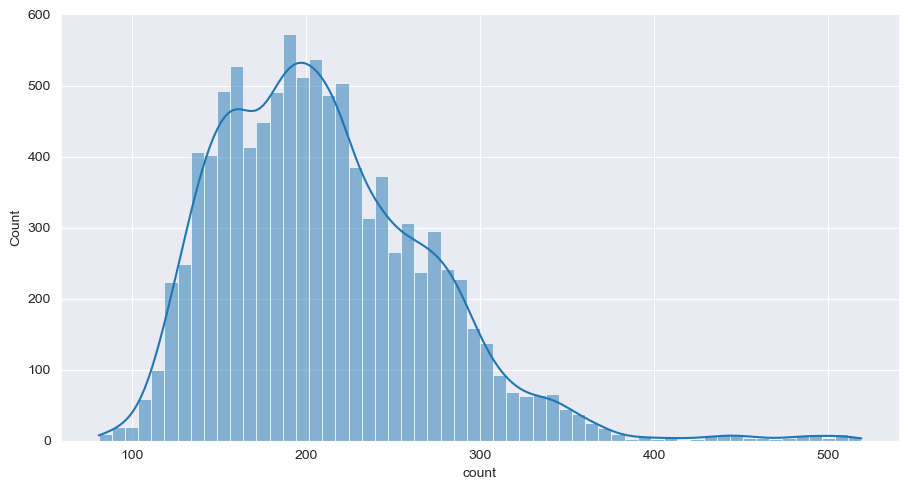

In [173]:
ax = sns.displot(ava_data, x="count", kde=True)
ax.figure.set_size_inches(10, 5)

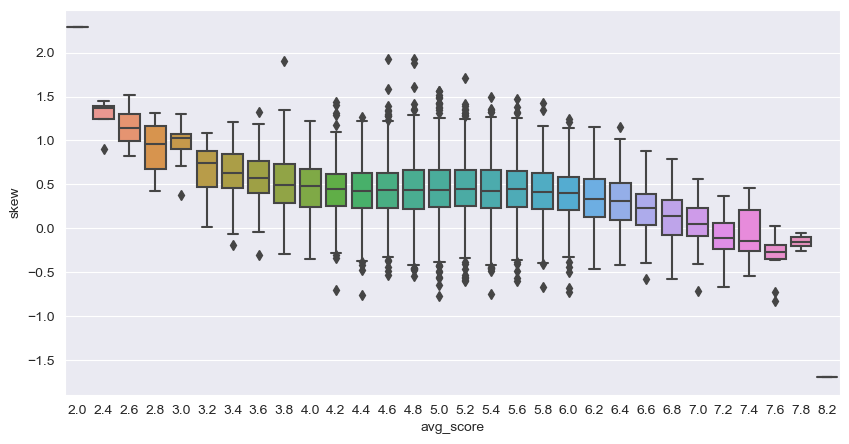

In [174]:
ax = sns.boxplot(ava_data, x="avg_score", y="skew")
ax.figure.set_size_inches(10, 5)

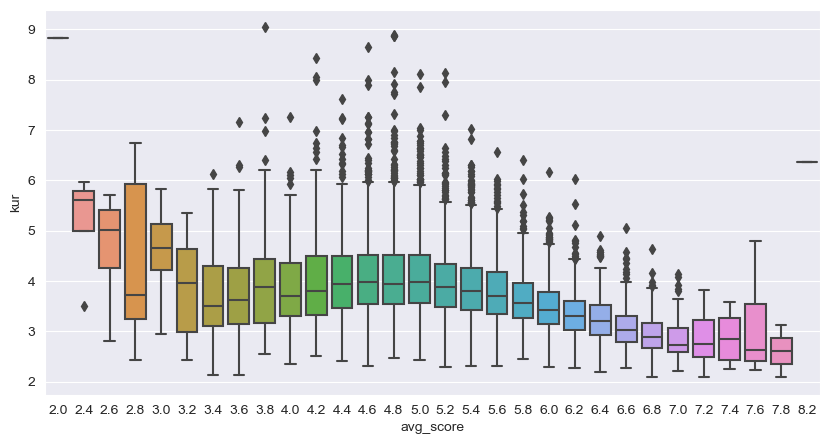

In [175]:
ax = sns.boxplot(ava_data, x="avg_score", y="kur")
ax.figure.set_size_inches(10, 5)

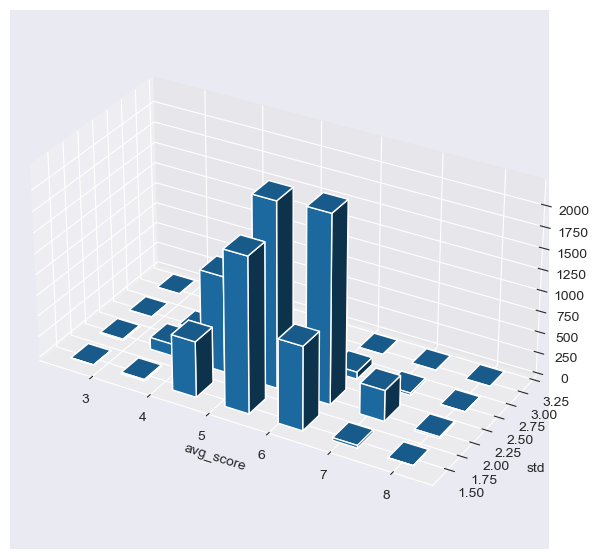

In [176]:
plt.figure(figsize=(7, 7))
# ax = plt.axes(projection="3d")
ax = plt.subplot(projection="3d")
ax.set_box_aspect((2, 1, 1))

hist, x_edges, y_edges = np.histogram2d(
    ava_data["avg_score"].to_numpy(), ava_data["std"].to_numpy(), bins=[7, 4]
)

x_pos, y_pos = np.meshgrid(x_edges[:-1] + 0.5, y_edges[:-1] + 0.5, indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = 0

dx = 0.4 * np.ones_like(z_pos)
dy = 0.3 * np.ones_like(z_pos)
dz = hist.ravel()
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz)

ax.set_xlabel("avg_score")
ax.set_ylabel("std")
plt.show()

In [192]:
plt.rcParams['font.sans-serif'] = ['FangSong']
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
sns.set(font='FangSong')
# Seaborn中设置字体-黑体，解决Seaborn中文乱码问题

ava_data["skew_group"] = ava_data["skew"].apply(lambda skew:
                                                -1 if skew < 0 else
                                                0 if 0 < skew < 1 else
                                                1)

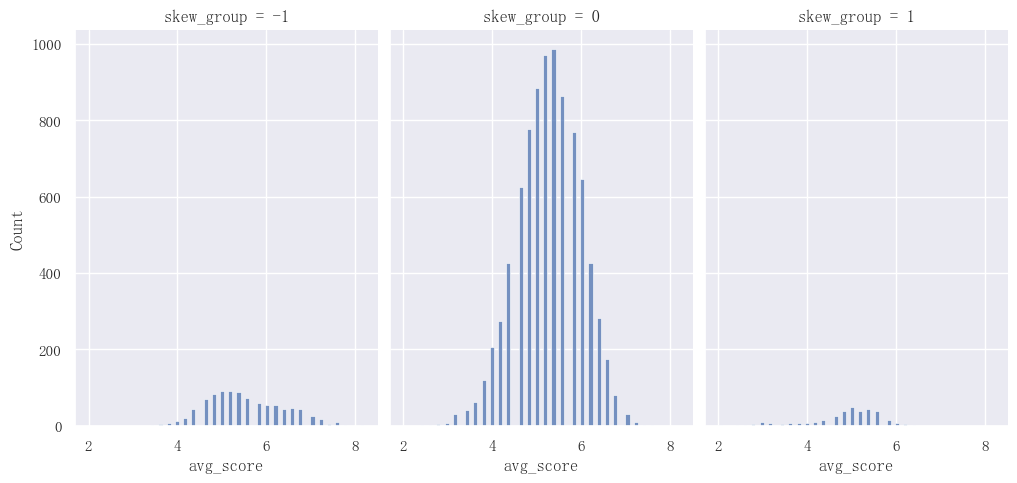

In [193]:
ax = sns.displot(ava_data, x="avg_score", col="skew_group")
ax.figure.set_size_inches(10, 5)

In [255]:
median_list = []  # 10000 rows, 1 column
for row in range(10000):
    tmp = []
    [tmp.extend([i] * int(ava_data.iloc[row][f"score_{i}"])) for i in range(1, 11)]
    median_list.append(np.median(tmp))

ava_data["median"] = median_list
ava_data

,index,img_id,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,avg_score,count,std,skew,kur,skew_group,median
0,23,954228,5,9,17,17,43,18,12,1,5,2,4.8,129,1.861399,0.317165,3.372472,0,5.0
1,30,953348,0,0,9,16,62,23,10,2,0,1,5.0,123,1.133381,1.083350,5.567617,1,5.0
2,60,953794,0,0,5,30,48,30,9,1,2,1,5.0,126,1.201850,1.426372,5.713440,1,5.0
3,97,954206,0,0,8,17,53,31,7,4,1,1,5.2,122,1.203410,0.917060,5.057851,0,5.0
4,105,954133,1,0,9,22,51,32,5,0,0,0,4.8,120,1.040833,-0.071540,3.518826,-1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,255474,56925,14,17,33,61,63,41,9,5,1,2,4.4,246,1.652001,0.127903,3.550799,0,4.0
9996,255514,56668,1,10,11,28,49,66,44,30,13,6,5.8,258,1.789201,0.120011,2.885958,0,6.0
9997,255526,56938,1,7,17,40,84,56,31,13,6,1,5.2,256,1.505770,0.435227,3.385739,0,5.0
9998,255528,56711,0,0,8,11,26,47,48,56,30,22,7.0,248,1.741338,-0.132877,2.508488,-1,7.0


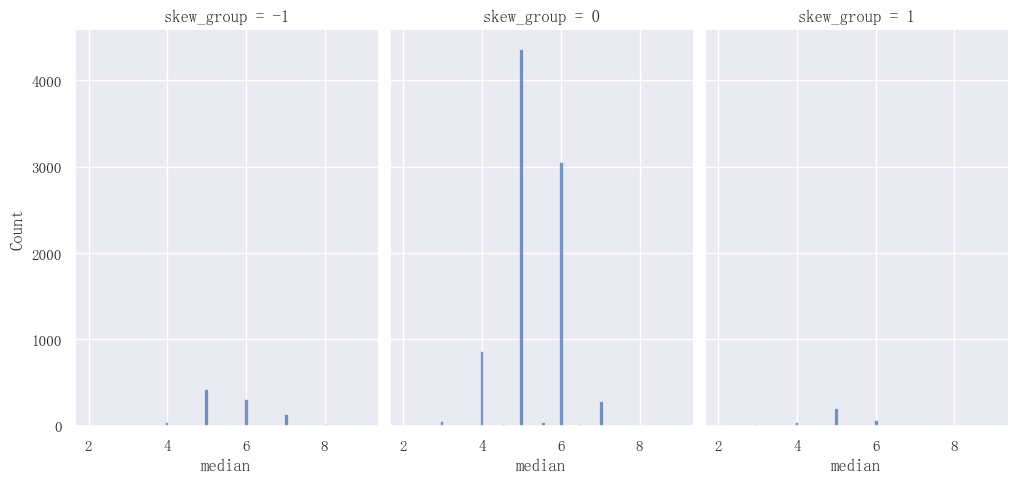

In [256]:
ax = sns.displot(ava_data, x="median", col="skew_group")
ax.figure.set_size_inches(10, 5)